In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read dataset
df = pd.read_csv(r"/content/Weather_Data(30).csv")

In [ ]:
# Display original data

In [ ]:
df.head()

,Date,Temperature,Humidity,WindSpeed,Precipitation,Condition,Month,Day
0,2024-01-01,14,62,8.0,0.0,Sunny,1,1
1,2024-01-02,16,58,10.0,0.0,Sunny,1,2
2,2024-01-03,12,71,12.2,2.0,Rain,1,3
3,2024-01-04,13,68,9.0,0.0,Cloudy,1,4
4,2024-01-05,15,64,8.0,0.0,Sunny,1,5


In [ ]:
df.tail()

,Date,Temperature,Humidity,WindSpeed,Precipitation,Condition
25,2024-01-26,14,75,12.5,5.2,Rain
26,2024-01-27,16,68,8.0,0.0,Cloudy
27,2024-01-28,18,62,7.0,0.0,Sunny
28,2024-01-29,19,59,9.0,0.0,Sunny
29,2024-01-30,20,57,8.0,0.0,Sunny


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           30 non-null     object 
 1   Temperature    30 non-null     int64  
 2   Humidity       30 non-null     int64  
 3   WindSpeed      30 non-null     float64
 4   Precipitation  30 non-null     float64
 5   Condition      30 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ KB


In [ ]:
df.describe()

,Temperature,Humidity,WindSpeed,Precipitation
count,30.000000,30.000000,30.000000,30.000000
mean,16.200000,64.433333,9.036667,0.990000
std,2.234525,6.066774,1.872023,1.928793
min,12.000000,55.000000,6.000000,0.000000
25%,14.250000,59.250000,8.000000,0.000000
50%,16.000000,63.500000,8.550000,0.000000
75%,18.000000,68.750000,10.100000,0.000000
max,20.000000,76.000000,12.600000,6.000000


In [ ]:
# Convert Date column into Datetime
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Temperature,Humidity,WindSpeed,Precipitation,Condition
0,2024-01-01,14,62,8.0,0.0,Sunny
1,2024-01-02,16,58,10.0,0.0,Sunny
2,2024-01-03,12,71,12.2,2.0,Rain
3,2024-01-04,13,68,9.0,0.0,Cloudy
4,2024-01-05,15,64,8.0,0.0,Sunny


In [ ]:
# Handling missing values
df["Precipitation"].fillna(0)
df['WindSpeed'].fillna(df["WindSpeed"].mean())
df["Humidity"].fillna(df["Humidity"].mean())
df.head()

,Date,Temperature,Humidity,WindSpeed,Precipitation,Condition
0,2024-01-01,14,62,8.0,0.0,Sunny
1,2024-01-02,16,58,10.0,0.0,Sunny
2,2024-01-03,12,71,12.2,2.0,Rain
3,2024-01-04,13,68,9.0,0.0,Cloudy
4,2024-01-05,15,64,8.0,0.0,Sunny


In [ ]:
# Adding missing columns (Month, Day)
df["Month"]= df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.head()

,Date,Temperature,Humidity,WindSpeed,Precipitation,Condition,Month,Day
0,2024-01-01,14,62,8.0,0.0,Sunny,1,1
1,2024-01-02,16,58,10.0,0.0,Sunny,1,2
2,2024-01-03,12,71,12.2,2.0,Rain,1,3
3,2024-01-04,13,68,9.0,0.0,Cloudy,1,4
4,2024-01-05,15,64,8.0,0.0,Sunny,1,5


In [ ]:
# Data Analysis

#1. Average Temperature & Humidity
avg_temp = df["Temperature"].mean()
avg_hum = df["Humidity"].mean()

print(f"Average Temperature: {avg_temp:.2f} C")
print(f"Average Humidity: {avg_hum:.2f} %")

Average Temperature: 16.20 C
Average Humidity: 64.43 %


In [ ]:
#2. Frequency of weather conditions
condition_count = df["Condition"].value_counts
print("\n===Condition Frequency===")
print(condition_count)


===Condition Frequency===
<bound method IndexOpsMixin.value_counts of 0      Sunny
1      Sunny
2       Rain
3     Cloudy
4      Sunny
5      Sunny
6      Sunny
7     Cloudy
8       Rain
9       Rain
10    Cloudy
11     Sunny
12     Sunny
13     Sunny
14    Cloudy
15      Rain
16      Rain
17    Cloudy
18     Sunny
19     Sunny
20     Sunny
21     Sunny
22     Sunny
23    Cloudy
24      Rain
25      Rain
26    Cloudy
27     Sunny
28     Sunny
29     Sunny
Name: Condition, dtype: object>


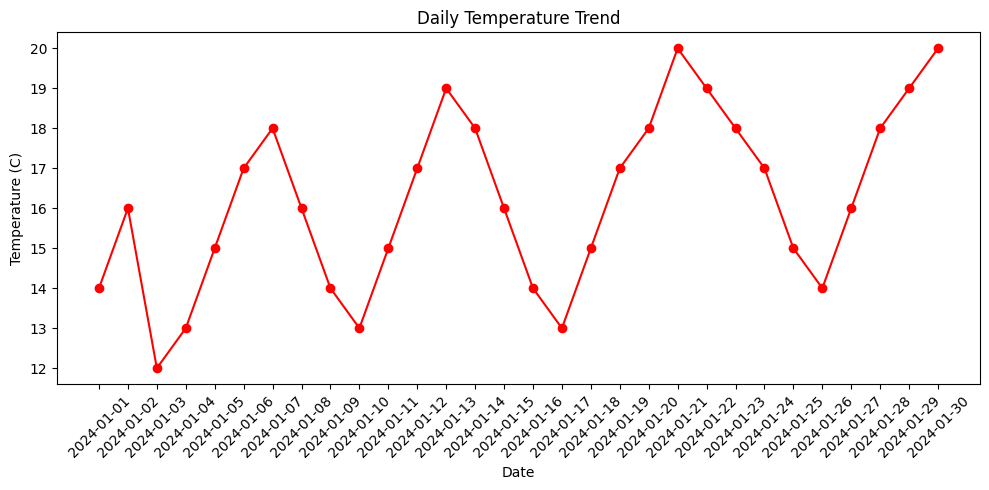

In [11]:
# Visualization

#1. Temperature Trend
plt.figure(figsize = (10,5))
plt.plot(df["Date"], df["Temperature"], marker = "o", color = "red")
plt.title("Daily Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

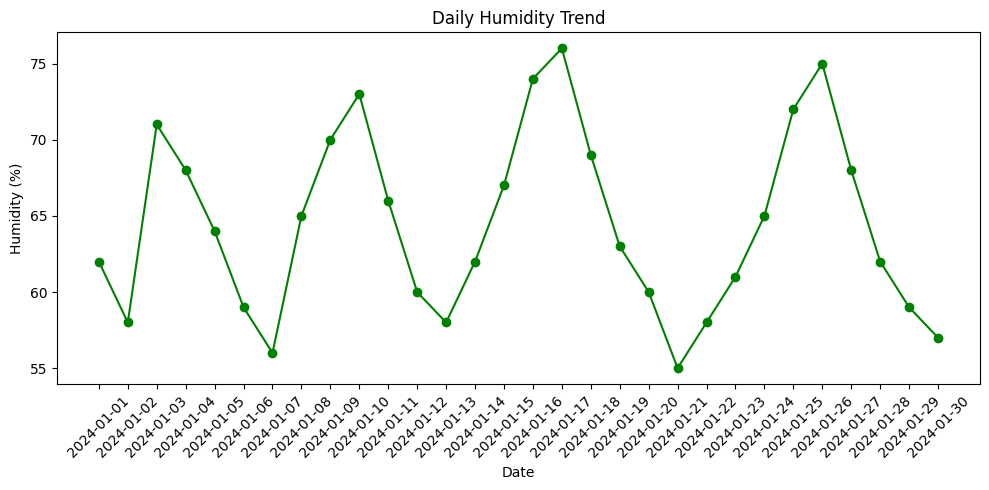

In [12]:
#2. Humidity Trend
plt.figure(figsize = (10,5))
plt.plot(df["Date"], df["Humidity"], marker = "o", color = "green")
plt.title("Daily Humidity Trend")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

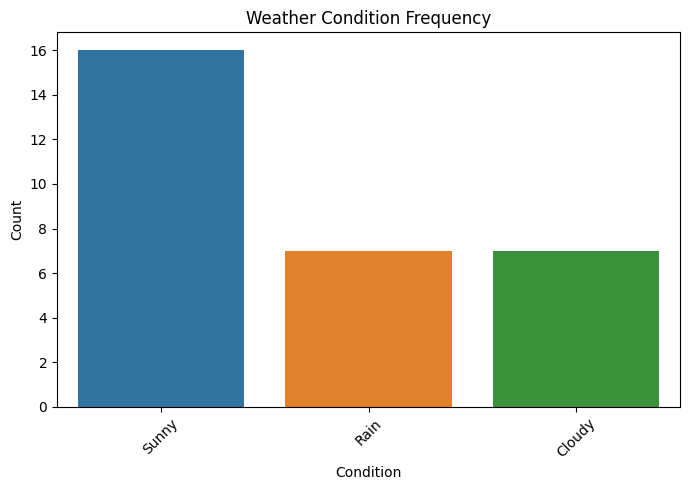

In [10]:
#3. Condition Frequency
plt.figure(figsize = (7,5))
sns.countplot(data = df, x = "Condition", hue = "Condition")
plt.title("Weather Condition Frequency")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

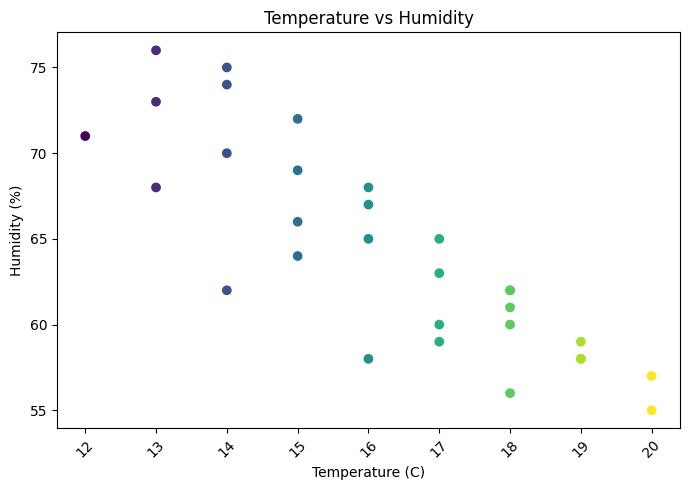

In [9]:
#4. Temperature vs Humidity (Scatter Plot)
plt.figure(figsize = (7,5))
colors = df["Temperature"]
plt.scatter(df["Temperature"], df["Humidity"], c=colors, cmap='viridis')
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity (%)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

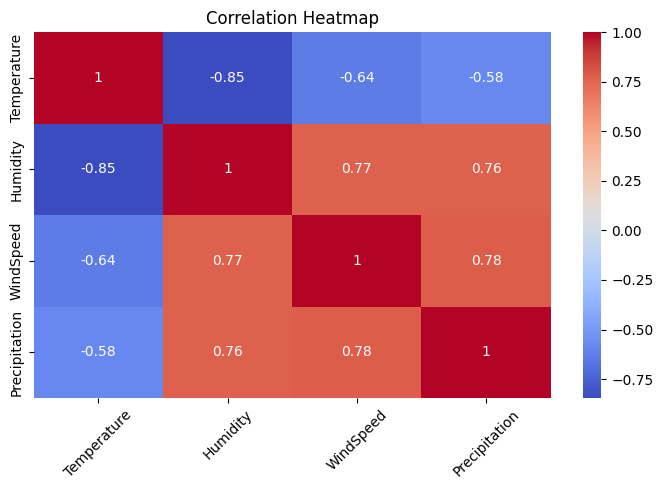

In [ ]:
#5. Correlation Heatmap
plt.figure(figsize = (7,5))
sns.heatmap(df[["Temperature", "Humidity", "WindSpeed", "Precipitation"]].corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()